In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

In [ ]:
%%capture
!wget https://www.dropbox.com/s/5b6o99k5ko6cr1r/train_1.csv
!wget https://www.dropbox.com/s/br8m56fomdxs7lw/train_2.csv
!wget https://www.dropbox.com/s/xmw5shslewwfi0n/test_1.csv
!wget https://www.dropbox.com/s/uxxc48au1zclpu2/test_2.csv

In [37]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1092734 entries, 0 to 1118644
Data columns (total 25 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   service_type            1092734 non-null  int64  
 1   is_mix_service          1092734 non-null  int64  
 2   online_time             1092734 non-null  int64  
 3   1_total_fee             1092734 non-null  float64
 4   2_total_fee             1092734 non-null  float64
 5   3_total_fee             1092734 non-null  float64
 6   4_total_fee             1092734 non-null  float64
 7   month_traffic           1092734 non-null  float64
 8   many_over_bill          1092734 non-null  int64  
 9   contract_type           1092734 non-null  int64  
 10  contract_time           1092734 non-null  int64  
 11  is_promise_low_consume  1092734 non-null  int64  
 12  net_service             1092734 non-null  int64  
 13  pay_times               1092734 non-null  int64  
 14  pa

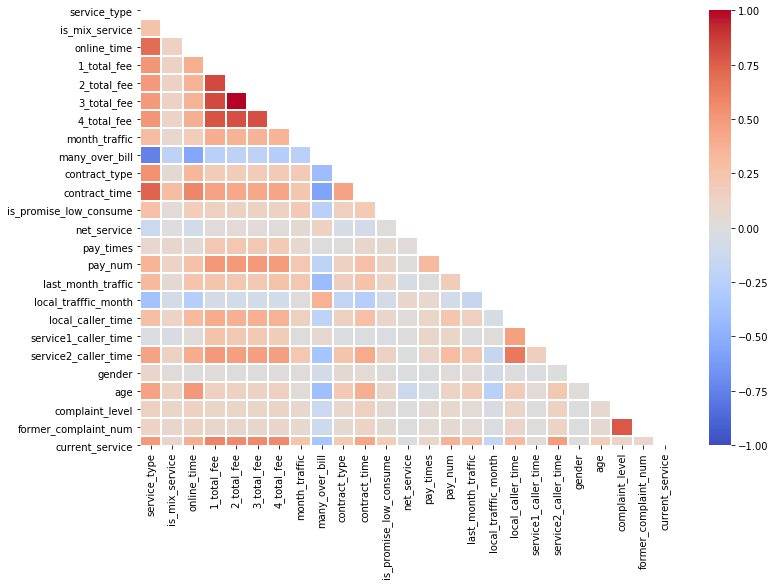

In [42]:
fig, ax = plt.subplots(figsize=(12, 8))
cor_m = df_train.corr()
matr = np.triu(cor_m)
sns.heatmap(cor_m, mask=matr, linewidths=1, linecolor='white', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

In [43]:
df_train['service_type'].value_counts()

1    596265
4    496434
3        35
Name: service_type, dtype: int64

In [44]:
df_train['is_mix_service'].value_counts()

0    1033294
1      59440
Name: is_mix_service, dtype: int64

In [45]:
df_train['many_over_bill'].value_counts()

1    581244
0    511490
Name: many_over_bill, dtype: int64

In [46]:
df_train['is_promise_low_consume'].value_counts()

0    1026438
1      66296
Name: is_promise_low_consume, dtype: int64

In [47]:
df_train['gender'].value_counts()

1    766478
2    326256
Name: gender, dtype: int64

In [48]:
df_train['complaint_level'].value_counts()

0    989190
1     82958
2     17638
3      2948
Name: complaint_level, dtype: int64

In [49]:
y = df_train['gender'].values
X = df_train.drop('gender', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [50]:
# Random Forest - 10

rf_10 = RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=7)
rf_10.fit(X_train, y_train)

y_pred_10 = rf_10.predict(X_test)

print('Accuracy (train, 10 деревьев):', round(accuracy_score(y_train, rf_10.predict(X_train)), 4))
print('f1 score (test, 10 деревьев) :', round(f1_score(y_test, y_pred_10), 4))
print('Accuracy (test, 10 деревьев) :', round(accuracy_score(y_test, y_pred_10), 4))

Accuracy (train, 10 деревьев): 0.9797
f1 score (test, 10 деревьев) : 0.8262
Accuracy (test, 10 деревьев) : 0.7253


In [13]:
# Random Forest - 50

rf_50 = RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=7)
rf_50.fit(X_train, y_train)

y_pred_50 = rf_50.predict(X_test)

print('Accuracy (train, 50 деревьев):', round(accuracy_score(y_train, rf_50.predict(X_train)), 4))
print('f1 score (test, 50 деревьев) :', round(f1_score(y_test, y_pred_50), 4))
print('Accuracy (test, 50 деревьев) :', round(accuracy_score(y_test, y_pred_50), 4))

Accuracy (train, 50 деревьев): 0.9998
f1 score (test, 50 деревьев) : 0.8378
Accuracy (test, 50 деревьев) : 0.7392


In [16]:
# Random Forest - 100

rf_100 = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=7)
rf_100.fit(X_train, y_train)

y_pred_100 = rf_100.predict(X_test)

print('Accuracy (train, 100 деревьев):', round(accuracy_score(y_train, rf_100.predict(X_train)), 4))
print('f1 score (test, 100 деревьев) :', round(f1_score(y_test, y_pred_100), 4))
print('Accuracy (test, 100 деревьев) :', round(accuracy_score(y_test, y_pred_100), 4))

Accuracy (train, 100 деревьев): 1.0
f1 score (test, 100 деревьев) : 0.8399
Accuracy (test, 100 деревьев) : 0.7414


In [19]:
# Random Forest - 100, entropy

rf_100 = RandomForestClassifier(n_estimators=100, criterion='entropy', n_jobs=-1, random_state=7)
rf_100.fit(X_train, y_train)

y_pred_100 = rf_100.predict(X_test)

print('Accuracy (train, 100 деревьев, entropy):', round(accuracy_score(y_train, rf_100.predict(X_train)), 4))
print('f1 score (test, 100 деревьев, entropy) :', round(f1_score(y_test, y_pred_100), 4))
print('Accuracy (test, 100 деревьев, entropy) :', round(accuracy_score(y_test, y_pred_100), 4))

Accuracy (train, 100 деревьев, entropy): 1.0
f1 score (test, 100 деревьев, entropy) : 0.84
Accuracy (test, 100 деревьев, entropy) : 0.7413


In [ ]:
# Перебор по сетке
grid = {
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2'] + list(range(1, 25)),
    'max_depth': [None, 5, 10, 15, 20]
}
rf = RandomForestClassifier(n_estimators=100, random_state=7)
rgs = RandomizedSearchCV(rf, grid, n_iter=10, scoring='f1', random_state=7, n_jobs=-1)

rgs.fit(X_train, y_train)